# Pandas Tutorial: Top 40 Useful Tricks


## PART - 1  ( 1 to 10)
1.	Extracting data with Regular Expression
2.	Pandas Pivot Table
3.	Pandas cut function, convert continuous to categorical data (wine)
4.	Split strings to columns, expand
5.	Remove Outliers by  Filtering
6.	Handle missing values with dropna() 
7.	Pandas Apply Function
8.	Pandas set_option for formating, change default max_columns
9.	Extracting Month and Year as separate columns from Pandas Datetime column
10.	Percentage change function in Pandas DataFrame.

## PART - 2  ( 11 to 20)
11.	Correlation Matrix Plot Pandas DataFrame
12.	Import number column as str
13.	Read date column from data as Index in DataFrame.
14.	Read data only specific columns
15.	Find percentage of records with missing values
16.	Reading Multiple Files
17.	Rearrange Numerical and Categorical Columns
18.	Label encoding multiple columns
19.	Finding correllation b/w features and target variable
20.	Replace special chars in columns names with underscore


## PART - 3  ( 21 to 30)
21.	Select data with Regular Expression
22.	Pandas profiling - Complete EDA
23.	Filter DataFrame by specific row values, using isin()
24.	Tilda ~ Operator
25.	Pandas read skipinitialspace
26.	Scalar filtering with ix
27.	Move column(s) to the begining or end in Pandas DataFrame (Alexander from Stackoverflow)
28.	Pandas reading broad charsets
29.	Create Random DataFrame (numpy students marks)
30.	Random sample from large data


## PART - 4  ( 31 to 40)
31.	Pandas Cumulative sum cumsum() function
32.	Best way to loop through DataFrame : for index, row in df.iterrows():
33.	Pandas rank
34.	Pandas map and applymap
35.	Pandas read from Clipboard, useful?
36.	Select columns by data type select_dtypes
37.	reverse row/column
38.	Convert data type of columns
39.	Create csv Zip file from DataFrame
40.	Load large dataset in Pandas



In [108]:
# Importing packages, set data source paths
import pandas as pd
import numpy as np

breast_cancer = 'https://raw.githubusercontent.com/datamites/pandas/master/breast_cancer.csv'
adult = 'https://raw.githubusercontent.com/datamites/pandas/master/adult10.data'
book_price = 'https://raw.githubusercontent.com/datamites/pandas/master/book_price_data.xlsx'
book_reviews = 'https://raw.githubusercontent.com/datamites/pandas/master/book_reviews_price.xlsx'
hp_costs = 'https://raw.githubusercontent.com/datamites/pandas/master/hp_other_costs.csv'
house_price_bangalore = 'https://raw.githubusercontent.com/datamites/pandas/master/house_price_bangalore.csv'
mtcars = 'https://raw.githubusercontent.com/datamites/pandas/master/mtcars.csv'
mtcars_missing = 'https://raw.githubusercontent.com/datamites/pandas/master/mtcars_missing.csv'
wine= 'https://raw.githubusercontent.com/datamites/pandas/master/winequality.csv'
sales_returns = 'https://raw.githubusercontent.com/datamites/pandas/master/sales_returns.csv'
superstore_orders = 'https://raw.githubusercontent.com/datamites/pandas/master/superstore_orders.csv'
car_sales = 'https://raw.githubusercontent.com/datamites/pandas/master/car-sales.csv'


# PART - 1 (1 to 10)

## 1.    Extracting data with Regular Expression

In [43]:
data = pd.read_csv(hp_costs)
print(data.shape)
data.head()

(13320, 10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,other_costs,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,custom 2.0L reg 1.76L misc 3.7L,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,custom 2.4L reg 5.4L,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,reg 2.79L misc 3.5L,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,custom 2.5L reg 4.28L pd 1.34L misc 1.6L,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,reg 2.3L,51.00


In [44]:
data['other_costs_list'] =  data.other_costs.str.findall('\d+.\d+')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,other_costs,price,other_costs_list
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,custom 2.0L reg 1.76L misc 3.7L,39.07,"[2.0, 1.76, 3.7]"
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,custom 2.4L reg 5.4L,120.00,"[2.4, 5.4]"
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,reg 2.79L misc 3.5L,62.00,"[2.79, 3.5]"
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,custom 2.5L reg 4.28L pd 1.34L misc 1.6L,95.00,"[2.5, 4.28, 1.34, 1.6]"
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,reg 2.3L,51.00,[2.3]


In [45]:
data.other_costs_list[0]

['2.0', '1.76', '3.7']

In [46]:
for i,row in data.iterrows():
    data.loc[i,'total_cost'] = row.price + sum([float(x) for x in row.other_costs_list])

In [47]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,other_costs,price,other_costs_list,total_cost
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,custom 2.0L reg 1.76L misc 3.7L,39.07,"[2.0, 1.76, 3.7]",46.53
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,custom 2.4L reg 5.4L,120.00,"[2.4, 5.4]",127.80
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,reg 2.79L misc 3.5L,62.00,"[2.79, 3.5]",68.29
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,custom 2.5L reg 4.28L pd 1.34L misc 1.6L,95.00,"[2.5, 4.28, 1.34, 1.6]",104.72
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,reg 2.3L,51.00,[2.3],53.30


## 2.	Pandas Pivot Table

In [48]:
data = pd.read_csv(superstore_orders)
print(data.shape)
data.head()

(9994, 21)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [49]:
data.pivot_table(columns='region', index = 'category', values = 'sales', aggfunc='sum')

region,Central,East,South,West
category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


In [50]:
data.pivot_table(columns='region', index = ['category','sub_category'], values = ['sales','profit'], aggfunc='sum').style.background_gradient(cmap='coolwarm')

## 3.	Pandas cut method, continuous to categorical data

In [51]:
data = pd.read_csv(wine, delimiter=';')
print(data.shape)
data.head()

(4898, 12)


,fixed-acidity,volatile-acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [53]:
data['quality_cat'] = pd.cut(data.quality, bins=[0,5,7,10],labels = ['bad','good','premium'])

In [54]:
data.head(20)

,fixed-acidity,volatile-acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,good
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,good


## 4.	Split strings to columns, expand

In [55]:
data = pd.read_excel(book_reviews)
print(data.shape)
data.head()

(100, 8)


,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,9.6 out of 10 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,8.2 out of 10 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00


In [56]:
data['Author_Firstname'] = data.Author.str.split(" ",n=1,expand=True)[0]
data['Author_Lastname'] = data.Author.str.split(" ",n=1,expand=True)[1]
data.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Author_Firstname,Author_Lastname
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Chris,Kuzneski
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Arun,Khopkar
2,Leviathan (Penguin Classics),Thomas Hobbes,9.6 out of 10 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Thomas,Hobbes
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,8.2 out of 10 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Agatha,Christie
4,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,Danny,Dreyer


In [57]:
data['Reviews_percent'] = 100*data.Reviews.str.split(" ",expand=True)[0].astype('float')/data.Reviews.str.split(" ",expand=True)[3].astype('float')

In [58]:
data.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Author_Firstname,Author_Lastname,Reviews_percent
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Chris,Kuzneski,80.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Arun,Khopkar,78.0
2,Leviathan (Penguin Classics),Thomas Hobbes,9.6 out of 10 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Thomas,Hobbes,96.0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,8.2 out of 10 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Agatha,Christie,82.0
4,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,Danny,Dreyer,90.0


## 5.	Remove Outliers by  Filtering

In [59]:
from scipy import stats

In [60]:
data = pd.read_csv(mtcars)
print(data.shape)
data.head()

(32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [61]:
data[abs(stats.zscore(data.hp))<2.5]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [62]:
data[(abs(stats.zscore(data.iloc[:,1:])<3)).all(axis=1)]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## 6. Handle missing values with dropna()

In [63]:
data = pd.read_csv(mtcars_missing)
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          31 non-null float64
cyl          32 non-null int64
disp         25 non-null object
hp           30 non-null float64
drat         31 non-null float64
wt           28 non-null object
qsec         20 non-null object
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ KB


In [65]:
data.qsec.sort_values(ascending=True)

1         *
3         -
28     14.5
6     15.84
0     16.46
26     16.7
21    16.87
27     16.9
22     17.3
11     17.4
16    17.42
12     17.6
13       18
18    18.52
2     18.61
4     18.61
10     18.9
19     19.9
5     20.22
7     20.22
8       NaN
9       NaN
14      NaN
15      NaN
17      NaN
20      NaN
23      NaN
24      NaN
25      NaN
29      NaN
30      NaN
31      NaN
Name: qsec, dtype: object

In [66]:
data.replace(['$','?','*','-'],np.nan, inplace=True)

In [67]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [68]:
data.isnull().sum()

car_model     0
mpg           1
cyl           0
disp          9
hp            2
drat          1
wt            6
qsec         14
vs            0
am            0
gear          0
carb          0
dtype: int64

In [69]:
data.dropna(thresh=10)

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,15.84,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,NaN,20.22,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,NaN,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,NaN,1,0,4,4
10,Merc 280C,17.8,6,167.6,123.0,3.92,3.44,18.9,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180.0,3.07,4.07,17.4,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180.0,3.07,NaN,17.6,0,0,3,3


In [70]:
len(data)*0.6

19.2

In [71]:
data.dropna(thresh=len(data)*0.6,axis=1)

,car_model,mpg,cyl,disp,hp,drat,wt,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,1,1,4,1
5,Valiant,18.1,6,225,105.0,2.76,3.46,1,0,3,1
6,Duster 360,14.3,8,360,245.0,3.21,3.57,0,0,3,4
7,Valiant 2,18.1,6,225,105.0,2.76,NaN,1,0,3,1
8,Valiant,18.1,6,225,105.0,2.76,3.46,1,0,3,1
9,Merc 280,19.2,6,167.6,123.0,3.92,3.44,1,0,4,4


## 7.	Pandas Apply Function

In [72]:
data = pd.read_csv(house_price_bangalore)
print(data.shape)
data.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
data.fillna(method='ffill',inplace=True)

In [75]:
data.loc[:,['area_type','location','society']] = data.loc[:,['area_type','location','society']].apply(LabelEncoder().fit_transform)

In [76]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,19-Dec,419,2 BHK,464,1056,2.0,1.0,39.07
1,2,Ready To Move,317,4 Bedroom,2439,2600,5.0,3.0,120.00
2,0,Ready To Move,1179,3 BHK,2439,1440,2.0,3.0,62.00
3,3,Ready To Move,757,3 BHK,2186,1521,3.0,1.0,95.00
4,3,Ready To Move,716,2 BHK,2186,1200,2.0,1.0,51.00


## 8. Pandas set_option for formating, change default max_columns

In [91]:
data= pd.read_csv(breast_cancer)
print(data.shape)
data.head()


(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [92]:
pd.set_option('display.max_columns',50)

In [93]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## 9. Extracting Month & Year as separate columns from Pandas Date column

In [94]:
data = pd.read_csv(superstore_orders, parse_dates=['order_date','ship_date'])
print(data.shape)
data.head()

(9994, 21)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [95]:
data.order_date[0].year

2017

In [96]:
data['orderyear'] = data.order_date.apply(lambda x: x.year)
data['ordermonth'] = data.order_date.apply(lambda x: x.month)
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,orderyear,ordermonth
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10


In [97]:
data.pivot_table(columns='orderyear',index="category",values="sales",aggfunc='sum')

orderyear,2015,2016,2017,2018
category,,,,
Furniture,157192.8531,170518.237,198901.436,215387.2692
Office Supplies,151776.4120,137233.463,183939.982,246097.1750
Technology,175278.2330,162780.809,226364.180,271730.8110


## 10.	Percentage change function in Pandas DataFrame.

In [99]:
data.pivot_table(columns='orderyear',index="category",values=['profit'],aggfunc='sum').pct_change(axis=1)*100

profit                                  
orderyear         2015       2016        2017       2018
category                                                
Furniture          NaN -44.753489  130.828682 -56.632017
Office Supplies    NaN  11.092248   39.688767  13.334936
Technology         NaN  55.883907   18.714631  27.430650

# PART - 2 (11 to 20)

## 11.	Correlation Matrix Plot Pandas DataFrame

In [100]:
data = pd.read_csv(breast_cancer)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [104]:
data.corr().style.background_gradient('coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
mean radius,1,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.67909,-0.0973174,0.674172,0.735864,-0.2226,0.206,0.194204,0.376169,-0.104321,-0.0426413,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.00706589,0.730029
mean texture,0.323782,1,0.329533,0.321086,-0.0233885,0.236702,0.302418,0.293464,0.071401,-0.0764372,0.275869,0.386358,0.281673,0.259845,0.00661378,0.191975,0.143293,0.163851,0.00912717,0.0544575,0.352573,0.912045,0.35804,0.343546,0.0775034,0.27783,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.0867611,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.0816293,-0.00552339,0.969476,0.303038,0.970387,0.94155,0.150549,0.455774,0.563879,0.771241,0.189115,0.0510185,0.742636
mean area,0.987357,0.321086,0.986507,1,0.177028,0.498502,0.685983,0.823269,0.151293,-0.28311,0.732562,-0.0662802,0.726628,0.800086,-0.166777,0.212583,0.20766,0.37232,-0.0724966,-0.019887,0.962746,0.287489,0.95912,0.959213,0.123523,0.39041,0.512606,0.722017,0.14357,0.0037376,0.708984
mean smoothness,0.170581,-0.0233885,0.207278,0.177028,1,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.0684064,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.21312,0.0360718,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.35856
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1,0.883121,0.831135,0.602641,0.565369,0.497473,0.0462048,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.59021,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1,0.921391,0.500667,0.336783,0.631925,0.0762183,0.660391,0.617427,0.0985637,0.670279,0.69127,0.68326,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.51493,0.69636
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1,0.462497,0.166917,0.69805,0.0214796,0.71065,0.690299,0.0276533,0.490424,0.439167,0.615634,0.0953508,0.257584,0.830318,0.292752,0.855923,0.80963,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1,0.479921,0.303379,0.128053,0.313893,0.22397,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.0906507,0.219169,0.177193,0.426675,0.4732,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.0764372,-0.261477,-0.28311,0.584792,0.565369,0.336783,0.166917,0.479921,1,0.000110995,0.164174,0.0398299,-0.0901702,0.401964,0.559837,0.44663,0.341198,0.345007,0.688132,-0.253691,-0.0512692,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.0128376


## 12.	Import number column as string

In [106]:
data = pd.read_csv(superstore_orders, dtype= {'postal_code':'str'})
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
row_id           9994 non-null int64
order_id         9994 non-null object
order_date       9994 non-null object
ship_date        9994 non-null object
ship_mode        9994 non-null object
customer_id      9994 non-null object
customer_name    9994 non-null object
segment          9994 non-null object
country          9994 non-null object
city             9994 non-null object
state            9994 non-null object
postal_code      9983 non-null object
region           9994 non-null object
product_id       9994 non-null object
category         9994 non-null object
sub_category     9994 non-null object
product_name     9994 non-null object
sales            9994 non-null float64
quantity         9994 non-null int64
discount         9994 non-null float64
profit           9994 non-null float64
dtypes: float64(3), int64(2), object(16)
memory usage: 1.6+ MB


## 13.	Read date column from data as Index in DataFrame.

In [113]:
data = pd.read_csv(car_sales,index_col='Month',parse_dates=['Month'])
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


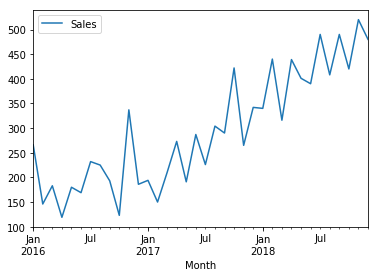

In [115]:
data.plot();

## 14.	Read data only specific columns

In [117]:
data = pd.read_csv(adult, usecols=['age','workclass','education','race'])
data.head()

,age,workclass,education,race
0,39,State-gov,Bachelors,White
1,50,Self-emp-not-inc,Bachelors,White
2,38,Private,HS-grad,White
3,53,Private,11th,Black
4,28,Private,Bachelors,Black


## 15.	Find percentage of records with missing values

In [118]:
data = pd.read_csv(mtcars_missing)
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,$,110.0,NaN,2.875,*,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,?,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,-,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [119]:
data.replace(['$','*','-','?'],np.nan,inplace=True)
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110.0,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,NaN,110.0,NaN,2.875,NaN,0,1,4,4
2,Datsun 710,NaN,4,108,NaN,3.85,NaN,18.61,1,1,4,1
3,Hornet 4 Drive,999.0,6,NaN,NaN,3.08,3.215,NaN,1,0,3,1
4,Datsun 710,22.8,4,NaN,93.0,3.85,2.32,18.61,1,1,4,1


In [121]:
data.isnull().sum()

car_model     0
mpg           1
cyl           0
disp          9
hp            2
drat          1
wt            6
qsec         14
vs            0
am            0
gear          0
carb          0
dtype: int64

In [125]:
data.shape[0]

32

In [124]:
data.dropna().shape

(11, 12)

In [127]:
(data.shape[0]-data.dropna().shape[0])*100/data.shape[0]

65.625

## 16.	Reading Multiple Files

In [128]:
data = pd.read_csv('log-15feb18.txt')
data.head()

,IP,Time,URL,Staus
0,10.128.2.1,15/Feb/2018:03:10:38,GET /home.php HTTP/1.1,302
1,10.128.2.1,15/Feb/2018:03:10:38,GET /login.php HTTP/1.1,200
2,10.128.2.1,15/Feb/2018:03:10:39,GET /css/bootstrap.min.css HTTP/1.1,200
3,10.131.0.1,15/Feb/2018:03:10:39,GET /css/font-awesome.min.css HTTP/1.1,200
4,10.130.2.1,15/Feb/2018:03:10:39,GET /css/normalize.css HTTP/1.1,200


In [132]:
from glob import glob
files = glob("log*")
files.sort()
files

['log-15feb18.txt',
 'log-16feb18.txt',
 'log-17feb18.txt',
 'log-18feb18.txt',
 'log-19feb18.txt']

In [134]:
data = pd.read_csv('log-16feb18.txt')
data.shape

(33, 4)

In [139]:
data = pd.concat( (pd.read_csv(file) for file in files),ignore_index=True)
data.head(25)

,IP,Time,URL,Staus
0,10.128.2.1,15/Feb/2018:03:10:38,GET /home.php HTTP/1.1,302
1,10.128.2.1,15/Feb/2018:03:10:38,GET /login.php HTTP/1.1,200
2,10.128.2.1,15/Feb/2018:03:10:39,GET /css/bootstrap.min.css HTTP/1.1,200
3,10.131.0.1,15/Feb/2018:03:10:39,GET /css/font-awesome.min.css HTTP/1.1,200
4,10.130.2.1,15/Feb/2018:03:10:39,GET /css/normalize.css HTTP/1.1,200
5,10.128.2.1,15/Feb/2018:03:10:39,GET /css/main.css HTTP/1.1,200
6,10.131.0.1,15/Feb/2018:03:10:39,GET /css/style.css HTTP/1.1,200
7,10.130.2.1,15/Feb/2018:03:10:39,GET /js/vendor/modernizr-2.8.3.min.js HTTP/1.1,200
8,10.130.2.1,15/Feb/2018:03:10:39,GET /js/vendor/jquery-1.12.0.min.js HTTP/1.1,200
9,10.131.0.1,15/Feb/2018:03:10:39,GET /bootstrap-3.3.7/js/bootstrap.min.js HTTP/1.1,200


In [137]:
data.shape

(184, 4)

## 17.	Rearrange Numerical and Categorical Columns

In [140]:
data = pd.read_csv(adult)
data.head()

,age,workclass,fnlwgt,education,educationNum,marital,occupation,relationship,race,sex,capGain,capLoss,HoursWeek,NativeCountry,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [144]:
data = pd.concat((data.select_dtypes(include='object'),data.select_dtypes(exclude='object')),axis=1)

## 18.	Label encoding multiple columns

In [145]:
data.head()

,workclass,education,marital,occupation,relationship,race,sex,NativeCountry,category,age,fnlwgt,educationNum,capGain,capLoss,HoursWeek
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,39,77516,13,2174,0,40
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,50,83311,13,0,0,13
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,38,215646,9,0,0,40
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,53,234721,7,0,0,40
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,28,338409,13,0,0,40


In [146]:
from sklearn.preprocessing import LabelEncoder
data.loc[:,'workclass':'category'] = data.loc[:,'workclass':'category'].apply(LabelEncoder().fit_transform)

In [147]:
data.head()

,workclass,education,marital,occupation,relationship,race,sex,NativeCountry,category,age,fnlwgt,educationNum,capGain,capLoss,HoursWeek
0,7,9,4,1,1,4,1,39,0,39,77516,13,2174,0,40
1,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
2,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
3,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
4,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40


## 19. Finding correllation b/w features and target variable

In [149]:
data = pd.read_csv(breast_cancer)
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [151]:
data_corr = data.corr()

In [154]:
data_corr.outcome.sort_values(ascending=False)

outcome                    1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
symmetry error            -0

## 20. Replace special chars in column names with '_'

In [155]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [156]:
data.rename(columns = {'mean radius':'mean $radius'},inplace=True)

In [157]:
data.head()

,mean $radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [160]:
data.columns = data.columns.str.replace('\W+',"_")

In [161]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,radius_error,texture_error,perimeter_error,area_error,smoothness_error,compactness_error,concavity_error,concave_points_error,symmetry_error,fractal_dimension_error,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [162]:
data.radius_error

0      1.0950
1      0.5435
2      0.7456
3      0.4956
4      0.7572
5      0.3345
6      0.4467
7      0.5835
8      0.3063
9      0.2976
10     0.3795
11     0.5058
12     0.9555
13     0.4033
14     0.2121
15     0.3700
16     0.4727
17     0.5692
18     0.7582
19     0.2699
20     0.1852
21     0.2773
22     0.4388
23     0.6917
24     0.8068
25     1.0460
26     0.2545
27     0.8529
28     0.4390
29     0.6003
        ...  
539    0.2196
540    0.2784
541    0.2542
542    0.3031
543    0.2351
544    0.2720
545    0.3460
546    0.2104
547    0.1144
548    0.2957
549    0.5196
550    0.3163
551    0.2800
552    0.2409
553    0.3013
554    0.2116
555    0.2199
556    0.2441
557    0.5375
558    0.2254
559    0.2388
560    0.3645
561    0.3141
562    0.2602
563    0.9622
564    1.1760
565    0.7655
566    0.4564
567    0.7260
568    0.3857
Name: radius_error, Length: 569, dtype: float64

# PART - 3 (21 to 30)

## 21.	Select data with Regular Expression

## 22.	Pandas profiling - Complete EDA

## 23.	Filter DataFrame by specific row values, using isin()

## 24.	Using Tilda ~ Operator  in Pandas data filtering

## 25.	Pandas read skipinitialspace

## 26.	Scalar filtering with ix

## 27. Move column(s) to the begining/ending in DataFrame

## 28.	Pandas reading broad charsets

## 29.	Create Random DataFrame 

## 30.	Random sample from large data

# PART - 4 (31 to 40)

## 31.	Pandas Cumulative sum cumsum() method

## 32.	Best way to loop through DataFrame , df.iterrows()

## 33.	Pandas rank method

## 34.	Pandas map and applymap methods

## 35.	Pandas read from Clipboard

## 36.	Select columns by data type select_dtypes

## 37.	reverse row/column

## 38.	Convert data type of columns

## 39.	Create csv Zip file from DataFrame

## 40.	Load large dataset in Pandas


# References & Credits
- Pandas Documentation: https://pandas.pydata.org/docs/
- BOOK : https://www.oreilly.com/library/view/python-for-data/9781449323592/

- https://stackoverflow.com/users/2411802/alexander
- https://stackoverflow.com/users/9840637/anky
- https://stackoverflow.com/users/1426056/waitingkuo
- https://stackoverflow.com/users/487339/dsm
- https://stackoverflow.com/users/1983512/gaurav-singh
- https://stackoverflow.com/users/475872/nick-crawford
- https://stackoverflow.com/users/3232824/kieranpc
- https://stackoverflow.com/users/7758804/trenton-mckinney
- https://stackoverflow.com/users/7932273/sociopath

